# Polynomial Regression

First let us use the Linear Regression model for the data

In [1]:
import pandas as pd
df = pd.read_csv("dataset.csv",header=None) #read the data
df.head()

,0,1
0,-10.0,-400.298943
1,-9.9,-390.568974
2,-9.8,-364.284896
3,-9.7,-355.562114
4,-9.6,-337.946480


In [2]:
x = df[[0]] #features
y = df[[1]] #labels

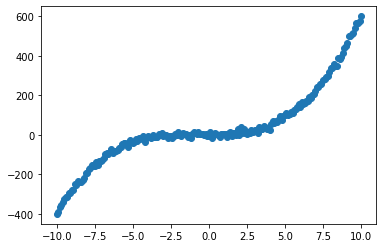

In [3]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(x,y)

From the plot it is pretty clear that a straight line will not fit the data

In [4]:
#generate a linear model
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#make predictions
Yp = lmodel.predict(x)

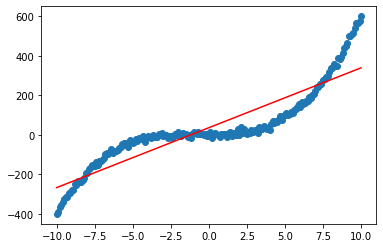

In [6]:
#viualize our model
plt.scatter(x,y)
plt.plot(x,Yp, color='r')
plt.show()

As mentioned above a straight line will not fit the data, but the straight line calculated here is the best fit for the data compared to other lines

In [7]:
#check the error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Yp,y)

69.52213948228973

PLOYNOMIAL REGRESSION MODEL

Generate the polynomial data directly and work on that data

In [8]:
#So here PolynomialFeatures will help us create a polynomial for our features directly
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree = 2) #polynomial of degree 2
x_pol = pol.fit_transform(x) #fit our features into the polynomial

In [9]:
#The data before was of the form x1, now it is of the form [m0*1 + m1*x1 + m2*(x1**2)]

In [10]:
#once we have the polynomial data, we will use that and generate a model using LinearRegression
lmodelp = LinearRegression()
lmodelp.fit(x_pol,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#attributes of our model
print(lmodelp.coef_)
print(lmodelp.intercept_)

[[ 0.         30.29837431  1.0367589 ]]
[1.00146538]


So we can see that there are 3 coefficients for x1^0, x1^1 and x1^2

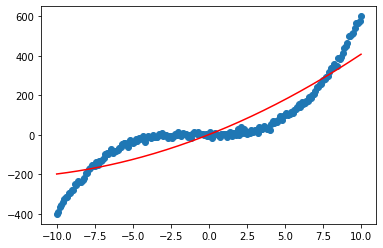

In [12]:
#make predictions
yp = lmodelp.predict(x_pol)
#visualize our predictions against actual data
plt.scatter(x,y)
plt.plot(x,yp,c='red')
plt.show()

Clearly, a polynomial of degree 2 also doesn't fit all of our data

In [13]:
#check error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(yp,y)

66.33882374676979

But, clearly the error of degree 2 polynomial is less than that of a straight line

In [14]:
#Let us try using a polynomial of degree 3
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree = 3)
x_pol = pol.fit_transform(x)

In [15]:
#The data before was of the form x1, now it is of the form [m0*(x1**0) + m1*(x1**1) + m2*(x1**2) + m3*(x1**3)]

In [16]:
#once we have the polynomial data, we will use that and generate a model using LinearRegression
lmodelp = LinearRegression()
lmodelp.fit(x_pol,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#attributes of our model
print(lmodelp.coef_)
print(lmodelp.intercept_)

[[0.         0.0515453  1.0367589  0.49913906]]
[1.00146538]


So we can see that there are 4 coefficients for x1^0, x1^1, x1^2 and x1^3

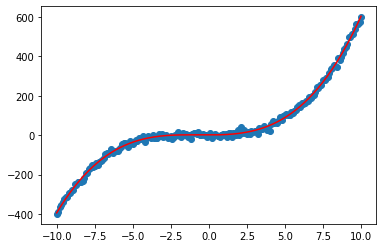

In [18]:
#make predictions
yp = lmodelp.predict(x_pol)
#Compare predictions to actual data
plt.scatter(x,y)
plt.plot(x,yp,c='red')
plt.show()

Clearly the polynomial of degree 3 fits our data perfectly

In [19]:
#check error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(yp,y)

7.293092384980133

The error has dropped drastically from around 66 to around 7